## In this notebook we will develop a lightweight algorithm for determining which part of a discharge is valid - beginning all up to non-zero current

In [1]:
using AlfvenDetectors
using PyPlot
using StatsBase

In [2]:
datapath = "/home/vit/vyzkum/alfven/cdb_data/data_sample/";

In [3]:
shots = readdir(datapath)

16-element Array{String,1}:
 "Jldata10000.h5"
 "Jldata10001.h5"
 "Jldata10002.h5"
 "Jldata10003.h5"
 "Jldata10004.h5"
 "Jldata10005.h5"
 "Jldata10006.h5"
 "Jldata10007.h5"
 "Jldata10008.h5"
 "Jldata10370.h5"
 "Jldata10514.h5"
 "Jldata10800.h5"
 "Jldata10866.h5"
 "Jldata10870.h5"
 "Jldata10893.h5"
 "Jldata10975.h5"

In [4]:
function getip()
    Ip = []
    for shot in shots
        push!(Ip, AlfvenDetectors.readip(joinpath(datapath, shot)))
    end
    return Ip
end

getip (generic function with 1 method)

In [5]:
Ips = getip();
filter!(x->length(x)>1,Ips)
N = length(Ips)

┌ Warning: /home/vit/vyzkum/alfven/cdb_data/data_sample/Jldata10975.h5: I_plasma data not found
└ @ AlfvenDetectors /home/vit/.julia/environments/v1.1/dev/AlfvenDetectors/src/data.jl:146


15

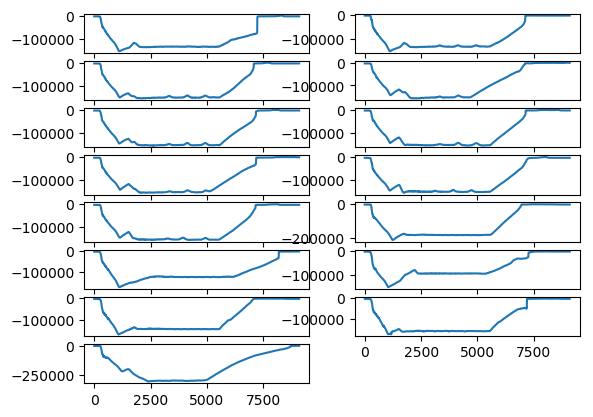

In [6]:
for i in 1:N
    subplot(ceil(Int, N/2),2,i)
    plot(Ips[i])
end

In [8]:
ip = AlfvenDetectors.makepositive(Ips[1])

9101-element Array{Float32,1}:
 2566.048 
 2555.879 
 2555.879 
 2569.438 
 2518.5916
 2549.0994
 2566.048 
 2586.3867
 2606.7253
 2576.2175
 2603.3354
 2603.3354
 2596.556 
    ⋮     
 2379.6113
 2383.0012
 2379.6113
 2396.56  
 2393.1704
 2383.0012
 2427.0679
 2393.1704
 2396.56  
 2386.3909
 2393.1704
 2359.2727

In [33]:
function valid_ip(x,ϵ=0.02)
    _x = AlfvenDetectors.makepositive(x)
    mx,imx = findmax(_x)
    inds = _x .>= mx*ϵ
    return [fill(true,imx); inds[imx+1:end]]
end

valid_ip (generic function with 2 methods)

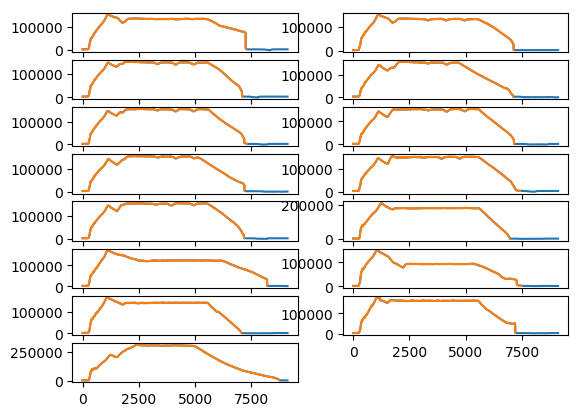

In [34]:
for i in 1:N
    subplot(ceil(Int, N/2),2,i)
    ip = AlfvenDetectors.makepositive(Ips[i])
    ts = collect(1:length(ip))
    plot(ts,ip)
    valid_inds = valid_ip(ip)
    plot(ts[valid_inds], ip[valid_inds])
end